In [1]:
import pandas as pd
from google.colab import files

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
uploaded = files.upload()

Saving cars_moldova_cat_num.csv to cars_moldova_cat_num.csv


In [3]:
df = pd.read_csv('/content/cars_moldova_cat_num.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),km_year
0,40,92,2011,4,195000.0,1800.0,2,1,7750.0,17727.272727
1,32,62,2014,11,135000.0,1500.0,0,0,8550.0,16875.000000
2,32,71,2012,11,110000.0,1500.0,0,0,6550.0,11000.000000
3,28,23,2006,11,200000.0,1600.0,3,0,4100.0,12500.000000
4,23,124,2000,5,300000.0,2200.0,0,0,3490.0,13636.363636
...,...,...,...,...,...,...,...,...,...,...
32069,42,88,2016,10,88000.0,1800.0,4,1,11500.0,14666.666667
32070,19,53,2002,3,225000.0,1800.0,3,0,4400.0,11250.000000
32071,6,77,2015,11,89000.0,1500.0,0,0,7000.0,12714.285714
32072,22,10,2006,1,370000.0,2000.0,0,0,4000.0,23125.000000


In [4]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z)*(1-sigmoid(z))

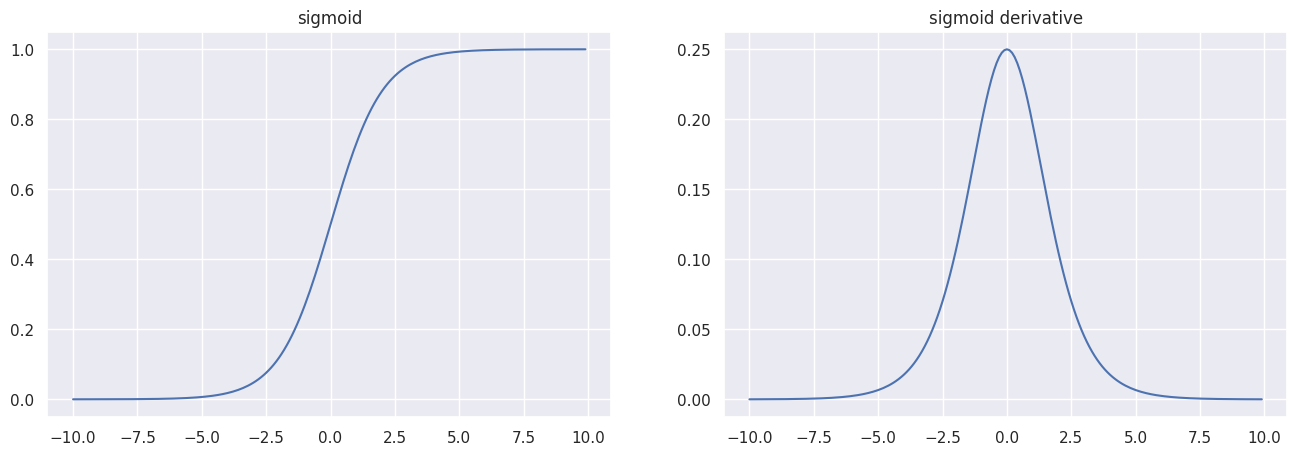

In [6]:
z = np.arange(-10,10,0.1)

plt.figure(figsize=(16,5))
plt.subplot(121); plt.plot(z,sigmoid(z)); plt.title('sigmoid')
plt.subplot(122); plt.plot(z,sigmoid_derivative(z)); plt.title('sigmoid derivative')
plt.show()

In [7]:
def to_class(logit, threshold = 0.5):
    return (logit>=threshold)*1

In [8]:
print( to_class(sigmoid(2.5), threshold = 0.7), ',',  to_class(sigmoid(-2.5), threshold = 0.7) )

1 , 0


In [9]:
_EPS_ = 1e-6
def loss(yhat, y):
    return -(y*np.log(yhat + _EPS_)+(1 - y)*np.log(1 - yhat + _EPS_)).mean()

In [10]:
print('неопределенность (yhat=0.5, y=1):\t %.3f'%loss(yhat=0.5, y=1))
print('неопределенность (yhat=0.5, y=0):\t %.3f'%loss(yhat=0.5, y=0))
print('уверенный 0 класс (yhat=0, y=0):\t %.3f'%loss(yhat=0.0, y=0))
print('уверенный 1 класс(yhat=1, y=1):\t %.3f'%loss(yhat=1, y=1))
print('ошибочный 0 класс (yhat=0, y=1):\t %.3f'%loss(yhat=0.0, y=1))
print('ошибочный 1 класс(yhat=1, y=0):\t %.3f'%loss(yhat=1, y=0))

неопределенность (yhat=0.5, y=1):	 0.693
неопределенность (yhat=0.5, y=0):	 0.693
уверенный 0 класс (yhat=0, y=0):	 -0.000
уверенный 1 класс(yhat=1, y=1):	 -0.000
ошибочный 0 класс (yhat=0, y=1):	 13.816
ошибочный 1 класс(yhat=1, y=0):	 13.816


In [11]:
class LinearRegression():
    def __init__(self,
                 learning_rate = 0.5,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 random_state = 42):
        self.lr      = learning_rate
        self.epochs  = epochs
        self.weights = weights
        self.bias    = bias
        self.seed    = random_state
        self.batch_size = batch_size
        self.cost    = np.zeros(epochs)

        # если веса и смещения заданы
        if not(self.weights is None) and (self.bias):
            if self.weights.size == X.shape[1]:
            #совмещаем в один массив, если мы этого не сделали
                self.weights = np.append(self.bias,self.weights)

    #---------------------------------
    def forward(self, X):
        return self.weights.dot(X.T)

    #---------------------------------
    def loss(self,yhat, y):
        return np.square(yhat - y).sum()/y.size

    #---------------------------------
    def grad_step(self,yhat, y, X):
        return 2*np.dot(X.T, (yhat - y)) / y.size

    #---------------------------------
    def update(self):
        return self.weights - self.lr*self.grad

    #---------------------------------
    def init(self, weights_size):
        np.random.seed(self.seed)
        return np.random.randn(weights_size)/np.sqrt(weights_size)

    #---------------------------------
    def add_bias(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))

    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat

    #---------------------------------
    def score(self, X, y):
        yhat = self.predict(X)
        return 1-np.sum(np.square(y-yhat))/np.sum(np.square(y-np.mean(y)))

     #---------------------------------
    def load_batch(self,X,y):
        idx_batch = np.random.randint(0,X.shape[0],self.batch_size)
        x_batch   = np.take(X, idx_batch, axis=0)
        x_batch   = self.add_bias(x_batch)
        y_batch   = np.take(y, idx_batch)
        return  x_batch, y_batch

    #---------------------------------
    def fit(self, X, y):

        np.random.seed(self.seed)

        if self.weights is None:
            self.weights = self.init(X.shape[1])

        if self.bias is None:
            self.bias    = self.init(1)

        if self.weights.size == X.shape[1]:
            #совмещаем в один массив, если мы этого не сделали
            self.weights = np.append(self.bias,self.weights)

        self.grad    = np.zeros(self.weights.shape)
        self.cost    = np.zeros(self.epochs)

        if self.batch_size is None:
            x_batch   = self.add_bias(X)
            y_batch   = y

        for i in range(self.epochs):

            if self.batch_size:
                x_batch, y_batch = self.load_batch(X,y)

            yhat         = self.forward(x_batch)
            self.grad    = self.grad_step(yhat,  y_batch, x_batch)
            self.weights = self.update()
            self.cost[i] = self.loss(yhat,  y_batch)

        self.bias = self.weights[0]

    #---------------------------------
    def plot_cost(self, figsize = (12,6)):
        plt.figure(figsize = figsize)
        plt.plot(self.cost,'-*')
        plt.show()

    #---------------------------------
    def get_w_and_b(self):
        return (self.weights[1:], self.bias)

In [12]:
class ElasticRegression(LinearRegression):
    def __init__(self,
                 learning_rate = 0.5,
                 l1_penalty = 0.001,
                 l2_penalty = 0.001,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 random_state = 42):

        super().__init__(learning_rate = learning_rate,
                         epochs = epochs,
                         weights = weights,
                         bias    = bias,
                         batch_size   = batch_size,
                         random_state = random_state)
        self.l1_penalty = l1_penalty
        self.l2_penalty = l2_penalty
    #---------------------------------
    def loss(self,yhat, y):
        l1_term = self.l1_penalty*np.sum(self.weights[1:])/y.size
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))/y.size
        return np.square(yhat - y).mean() + l1_term + l2_term


    #---------------------------------
    def update(self):
        l2_term = self.l2_penalty*np.sum(self.weights[1:])
        return self.weights - self.lr*(self.grad + self.l1_penalty + l2_term)

In [13]:
_EPS_ = 1e-6

class LogisticRegression(ElasticRegression):
    def __init__(self,
                 learning_rate = 0.5,
                 l1_penalty = 0.0,
                 l2_penalty = 0.0,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 threshold = 0.5,
                 batch_size   = 1000,
                 random_state = 42):

        super().__init__(learning_rate = learning_rate,
                         epochs = epochs,
                         weights = weights,
                         bias    = bias,
                         batch_size   = batch_size,
                         random_state = random_state,
                         l1_penalty = l1_penalty,
                         l2_penalty = l2_penalty)
        self.learning_rate = learning_rate/2
        self.threshold = threshold

    #---------------------------------
    def loss(self,yhat, y):

        l1_term = self.l1_penalty*np.sum(self.weights[1:])/y.size
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))/y.size

        return -(y*np.log(yhat  + _EPS_)+(1 - y)*np.log(1 - yhat  + _EPS_)).mean()\
            + l1_term+ l2_term

    #---------------------------------
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    #---------------------------------
    def forward(self, X):
        return self.sigmoid(self.weights.dot(X.T))

    #---------------------------------
    def to_class(self,logit):
        return (logit>=self.threshold)*1

    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))

        if self.threshold:
            return self.to_class(yhat)
        else:
            return yhat
    #---------------------------------
    def score(self, X, y):
        yhat  = self.predict(X)
        return sum((yhat==y)*1)/y.size

    #---------------------------------
    def classification_report(self, X,y):
        tp = 0 # true_positives
        tn = 0 # true_negatives
        fp = 0 # false_positives
        fn = 0 # false_negatives

        yhat  = self.predict(X)
        total = yhat.size

        for yhati,yi in zip(yhat,y):
            if yi == 1 and yhati == 1:
                tp += 1
            elif yi == 0 and yhati == 0:
                tn += 1
            elif yi == 1 and yhati == 0:
                fn += 1
            elif yi == 0 and yhati == 1:
                fp += 1

        print('True Positives:%.0f'%(tp), end = '\t')
        print('False Positives:%.0f'%(fp))
        print('False Negatives:%.0f'%(fn), end = '\t')
        print('True Negatives:%.0f'%(tn))

        print('Accuracy:%.4f'% ((tp + tn) / total))
        print('Recall:%.4f'% (tp / (tp + fn)), end = '\t')
        print('Precision:%.4f'%(tp / (tp + fp)))
        print('f1 measure:%.4f'%(tp / (tp + 0.5*(fp+fn))))

In [14]:
X = df[num_columns].values
y = df["Transmission"].values
features_names = df[num_columns].columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
pd.DataFrame(X_train).tail()

,0,1,2,3,4
22446,0.64,0.479896,0.353333,0.046092,0.251134
22447,0.74,0.465893,0.479167,0.077144,0.331520
22448,0.70,0.572360,0.333333,0.058106,0.356492
22449,0.70,0.581916,0.375000,0.046593,0.362475
22450,0.24,0.579916,0.000000,0.008016,0.147012


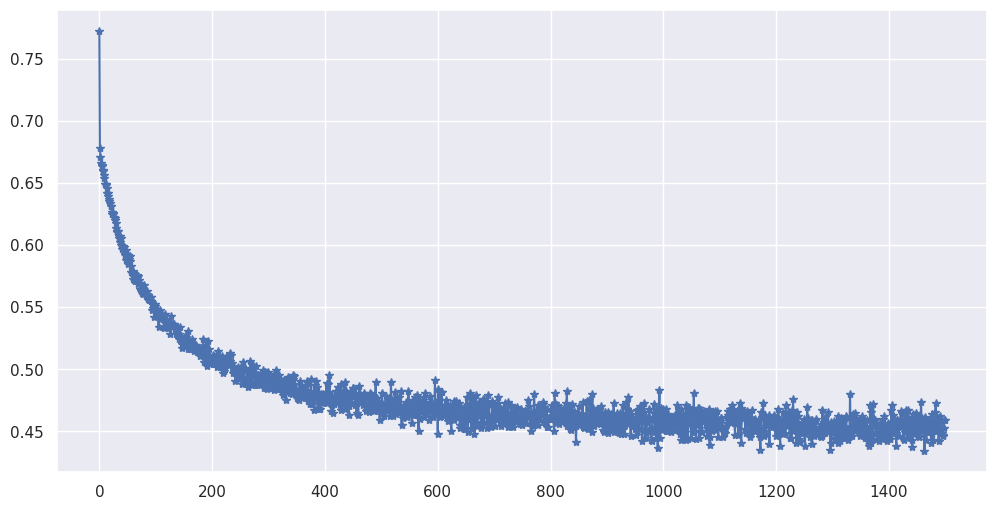

train Accuracy: 0.8040; test Accuracy: 0.8112
True Positives:3283	False Positives:730
False Negatives:1087	True Negatives:4523
Accuracy:0.8112
Recall:0.7513	Precision:0.8181
f1 measure:0.7833


In [15]:
regr = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

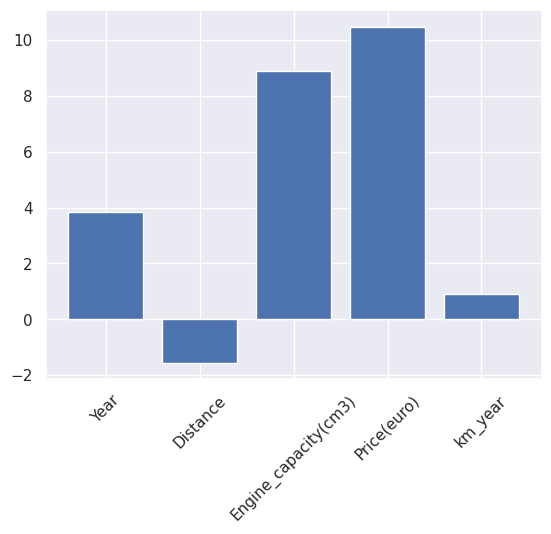

In [16]:
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

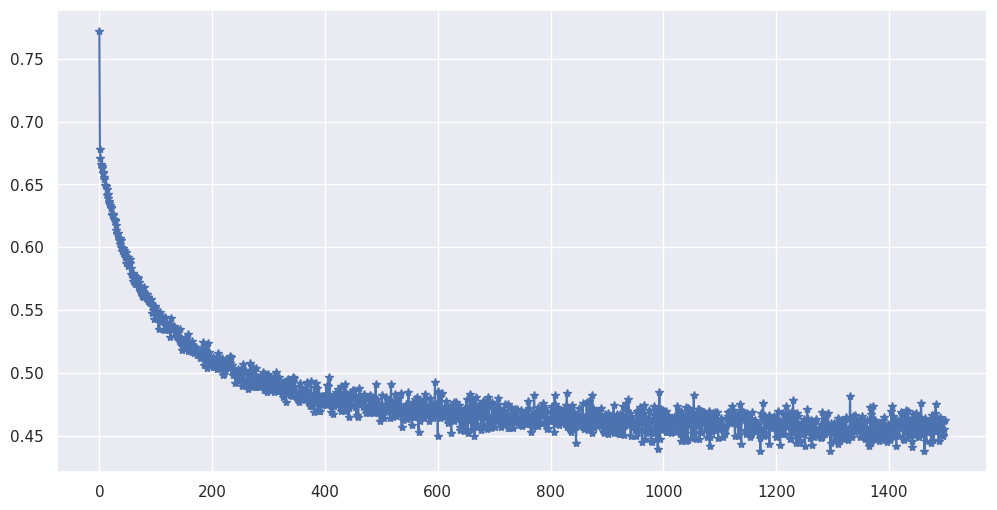

train Accuracy: 0.8034; test Accuracy: 0.8112
True Positives:3270	False Positives:717
False Negatives:1100	True Negatives:4536
Accuracy:0.8112
Recall:0.7483	Precision:0.8202
f1 measure:0.7826


In [17]:
regr = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000, l2_penalty = 0.0001)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

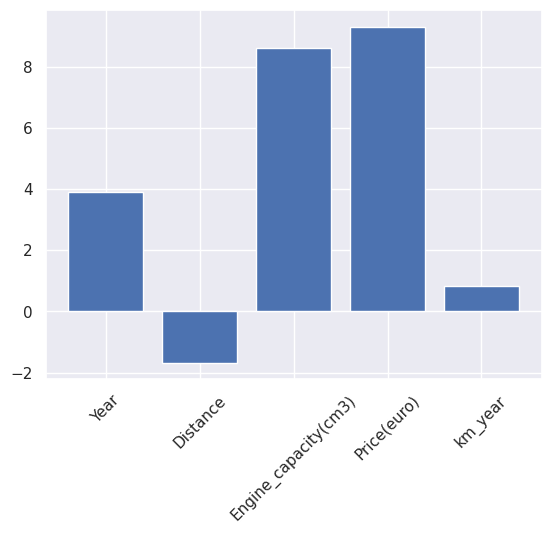

In [18]:
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

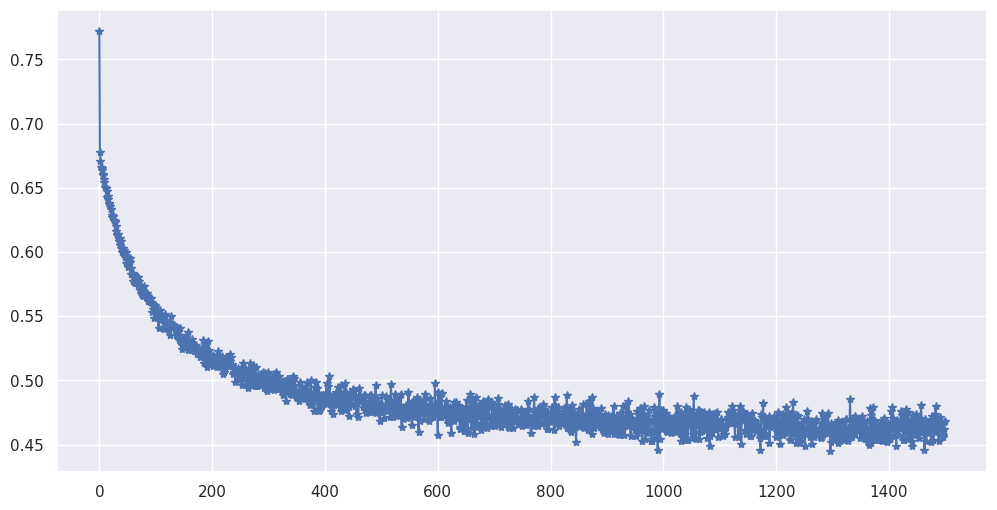

train Accuracy: 0.8003; test Accuracy: 0.8080
True Positives:3256	False Positives:734
False Negatives:1114	True Negatives:4519
Accuracy:0.8080
Recall:0.7451	Precision:0.8160
f1 measure:0.7789


In [19]:
regr = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000, l1_penalty = 0.005)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

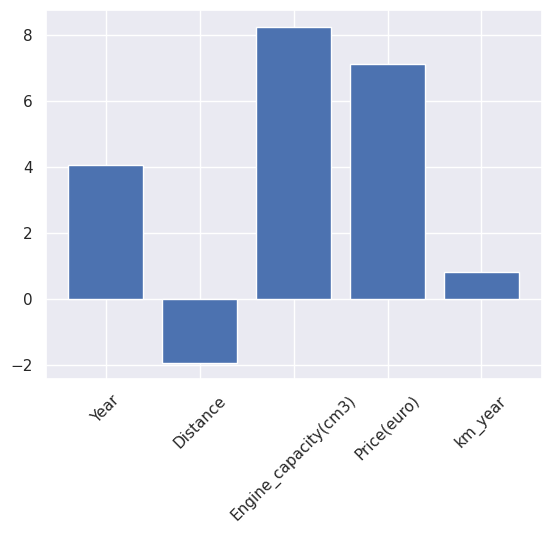

In [20]:
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

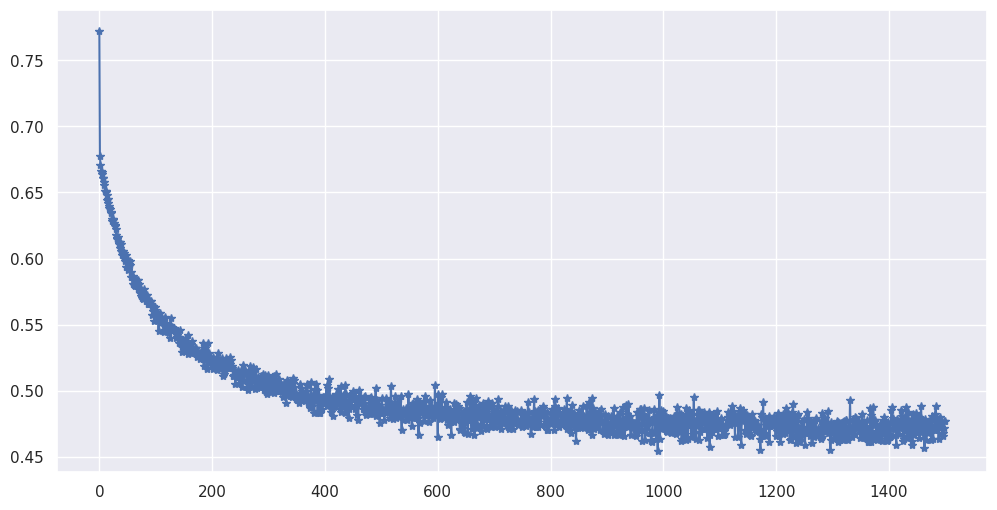

train Accuracy: 0.7950; test Accuracy: 0.8042
True Positives:3244	False Positives:758
False Negatives:1126	True Negatives:4495
Accuracy:0.8042
Recall:0.7423	Precision:0.8106
f1 measure:0.7750


In [21]:
regr = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000, l1_penalty = 0.008, l2_penalty = 0.00005)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

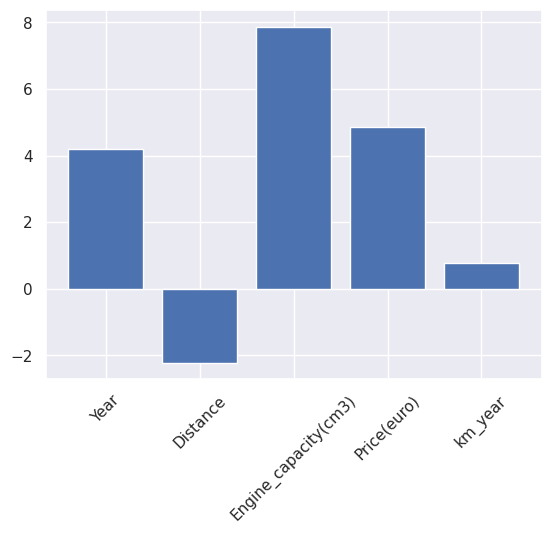

In [22]:
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

In [23]:
w, b = regr.get_w_and_b()

w[1] = 0
w[-1] = 0

regr = LogisticRegression(learning_rate=0.8,
                          epochs=1500,
                          batch_size=5000,
                          l1_penalty = 0.005,
                          weights = w,
                          bias = b)


print( 'train ACC: %.4f; test ACC: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

train ACC: 0.7526; test ACC: 0.7615
True Positives:3756	False Positives:1681
False Negatives:614	True Negatives:3572
Accuracy:0.7615
Recall:0.8595	Precision:0.6908
f1 measure:0.7660


# **Пракитческие задания**

1. Сгенерируйте линейно разделимые данные с другими пара-
метрами и проверьте модель логистической регрессии на этих
данных. Проанализируйте метрики классификации.



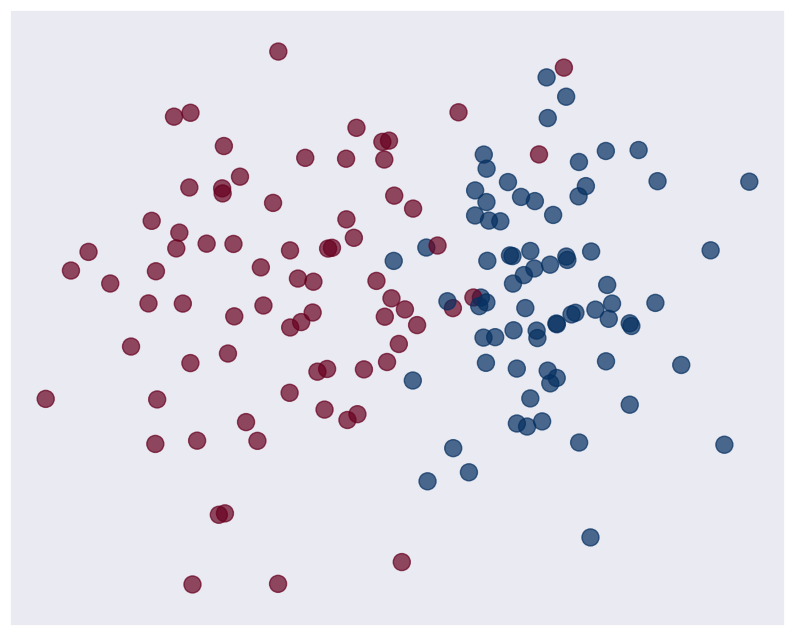

In [24]:
from sklearn.datasets import make_moons, make_circles, make_classification
from matplotlib.colors import ListedColormap

N = 150 #@param {type:"slider", min:50, max:250, step:25}
random_state = 17
def plot_data(ax,ds,name='',marker = 'o',colors =("#FF0000", '#0000FF'),alpha=0.7, s = 150, facecolor=True):
    X, y = ds

    cm_bright = ListedColormap(colors)
    ax.set_title(name, fontsize = 30)
    if facecolor:
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap='RdBu',s = s,
                   alpha =alpha)
    else:
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap='RdBu',s = s,
                   facecolor = 'None',
                   alpha =alpha)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    ax.grid(True)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())


def make_binary_clf(N, method = 'line',
                    noises = 0.15,
                    random_state = 42, n_feats=2, n_redun=0, n_infor=2,
                    n_cpc=1, class_s=2):

    if random_state: rng = np.random.RandomState(seed = random_state)

    if method == 'line' or method is None:
        X, y = make_classification(n_samples=N, n_features=n_feats,
                                   n_redundant=n_redun, n_informative=n_infor,
                                   n_clusters_per_class=n_cpc, class_sep=class_s,
                                   random_state=random_state)
        X += np.random.randn(*X.shape) *noises
        out = (X, y)

    elif method == 'moons':
        X, y = make_moons(n_samples=N, noise=noises,
                          random_state=random_state)

    elif method == 'circles':
        X, y = make_circles(n_samples=N, noise=noises, factor=0.5,
                            random_state=random_state )


    return X,y

X, y = make_classification(n_samples=N, n_features=6,
                                   n_redundant=0, n_informative=6,
                                   n_clusters_per_class=1, class_sep=2,
                                   random_state=17)



fig=plt.figure(figsize=(10,8))
ax = plt.subplot()
plot_data(ax, make_binary_clf(N, method='line', n_feats=6, n_redun=0, n_infor=6))


In [25]:
print("{} {}".format(X.shape, y.shape))

(150, 6) (150,)


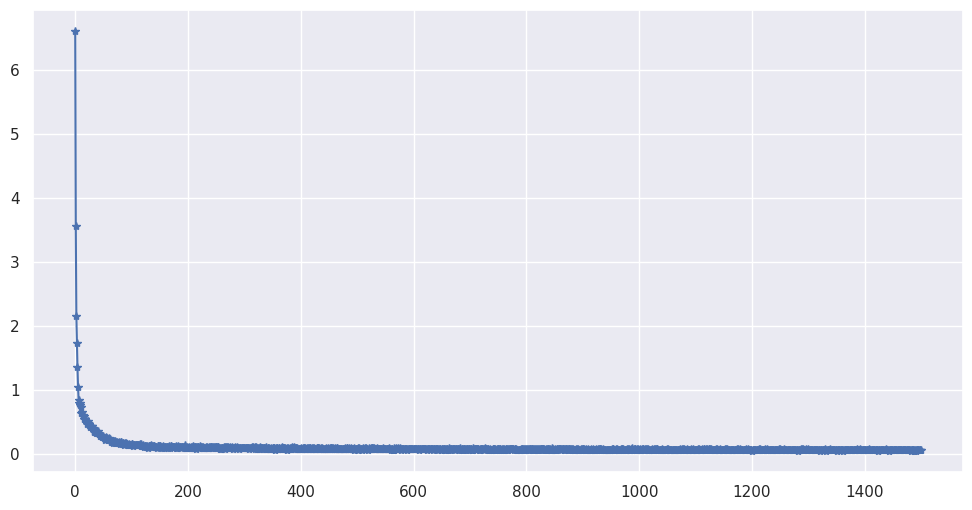

train Accuracy: 0.9867; test Accuracy: 0.9867
True Positives:75	False Positives:1
False Negatives:1	True Negatives:73
Accuracy:0.9867
Recall:0.9868	Precision:0.9868
f1 measure:0.9868


In [26]:
regr.fit(X,y)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X, y), regr.score(X, y)))

regr.classification_report(X, y)

2. Сгенерируйте данные, распределенные как знак инь-ян или
концентрические круги. Проверьте различные степени полиномов исходных данных и различные типы регуляризации для
достижения наилучшего качества классификации. Проанализируйте метрики классификации.

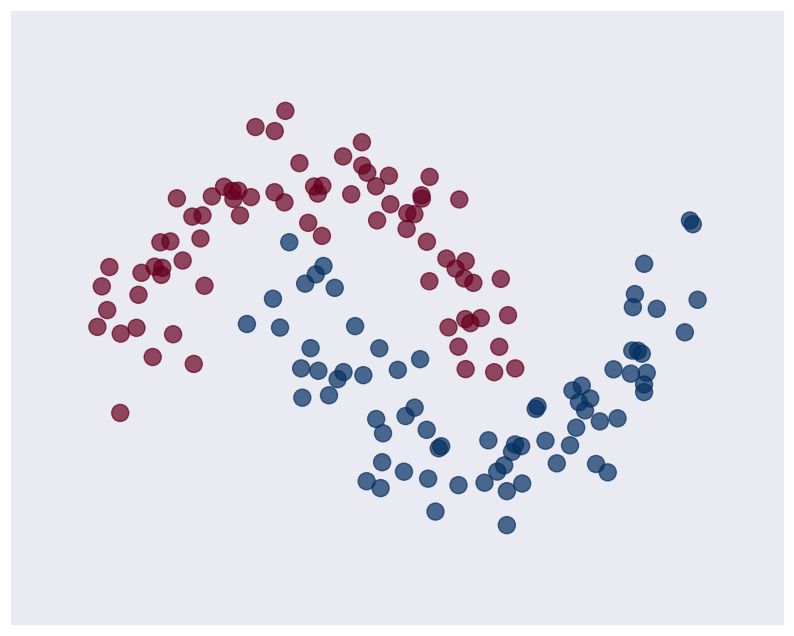

In [27]:
fig=plt.figure(figsize=(10,8))
ax = plt.subplot()
X_1, y_1 = make_binary_clf(N, method='moons', n_feats=6, n_redun=0, n_infor=6)
gen_data_1 = (X_1, y_1)
plot_data(ax, gen_data_1)

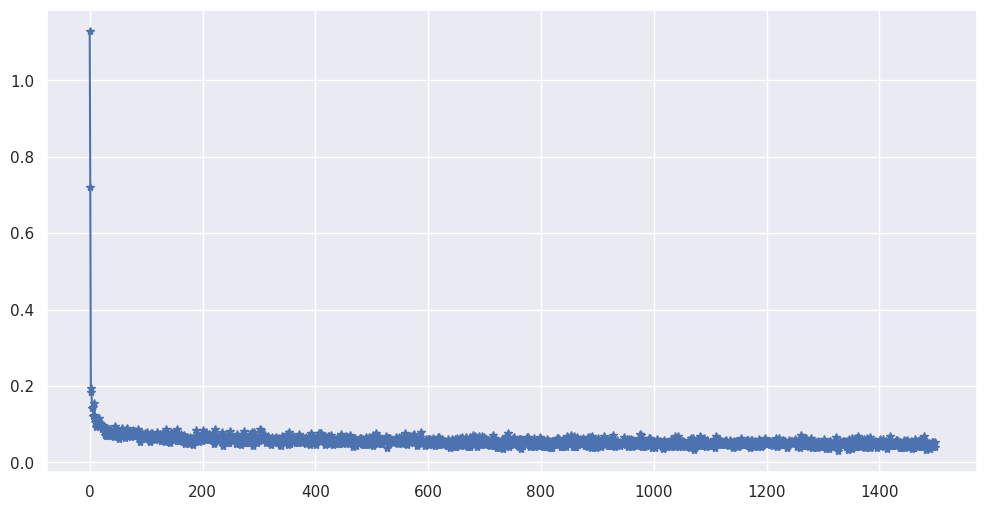

train Accuracy: 0.9933; test Accuracy: 0.9933
True Positives:75	False Positives:0
False Negatives:1	True Negatives:74
Accuracy:0.9933
Recall:0.9868	Precision:1.0000
f1 measure:0.9934


In [28]:
# Исходные данные

regr_2 = LogisticRegression(l1_penalty=0, l2_penalty=0, epochs=1500)

regr_2.fit(X, y)

regr_2.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr_2.score(X, y), regr_2.score(X, y)))

regr_2.classification_report(X, y)

In [29]:
def to_polynom(X, order = 2):
    order_range = range(order, order+1,1)
    out = np.copy(X)
    for i in order_range:
        out = np.hstack([out, np.power(X,i)])
    return out


X_poly = to_polynom(X, order = 2)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_poly, y, test_size=0.3, random_state=42)

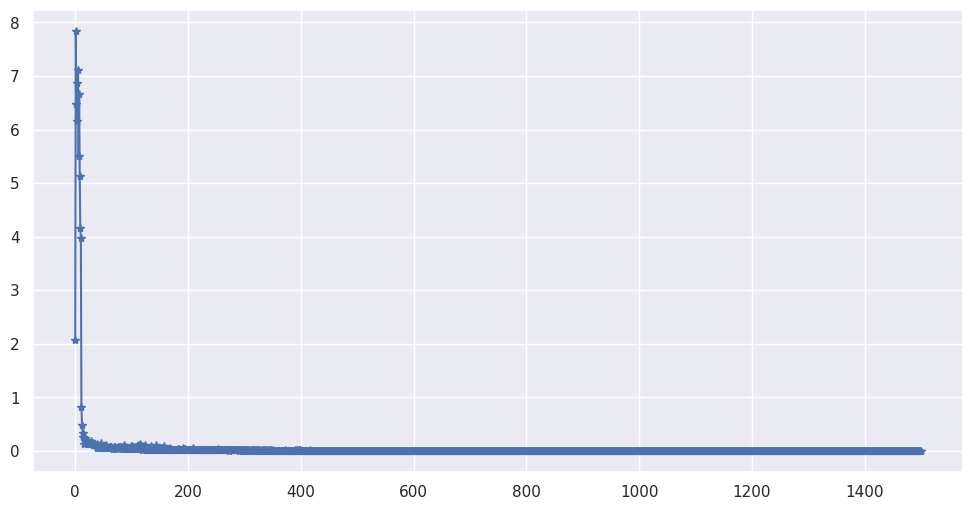

train Accuracy: 1.0000; test Accuracy: 1.0000
True Positives:57	False Positives:0
False Negatives:0	True Negatives:48
Accuracy:1.0000
Recall:1.0000	Precision:1.0000
f1 measure:1.0000


In [30]:
# Полином 2 степени

regr_2_1 = LogisticRegression(l1_penalty=0, l2_penalty=0, epochs=1500)

regr_2_1.fit(X_train_2, y_train_2)

regr_2_1.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr_2_1.score(X_train_2, y_train_2), regr_2_1.score(X_train_2, y_train_2)))

regr_2_1.classification_report(X_train_2, y_train_2)

<ipython-input-13-d21f78eb25d2>:37: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


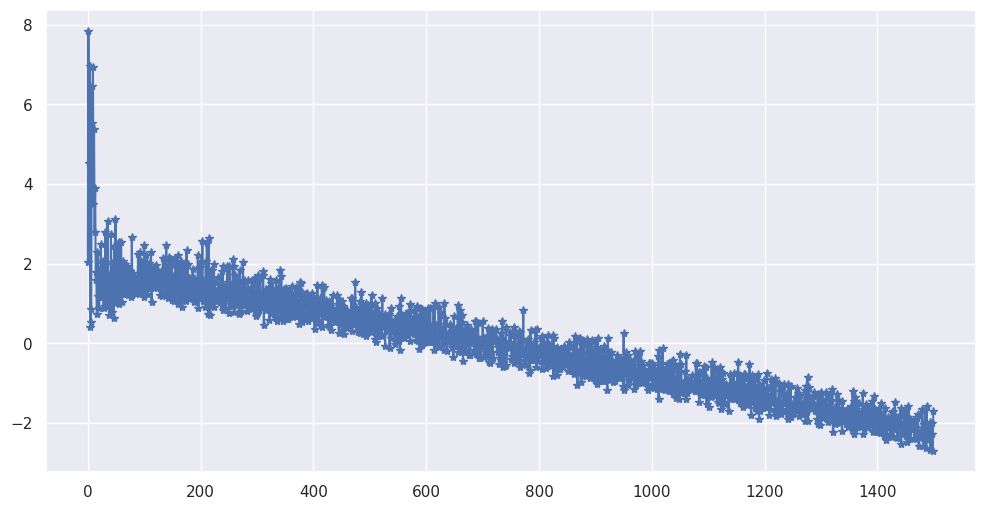

train Accuracy: 0.8762; test Accuracy: 0.8762
True Positives:51	False Positives:7
False Negatives:6	True Negatives:41
Accuracy:0.8762
Recall:0.8947	Precision:0.8793
f1 measure:0.8870


In [31]:
# Полином 2 степени и l1 регуляризация

regr_2_1 = LogisticRegression(l1_penalty=1, l2_penalty=0, epochs=1500)

regr_2_1.fit(X_train_2, y_train_2)

regr_2_1.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr_2_1.score(X_train_2, y_train_2), regr_2_1.score(X_train_2, y_train_2)))

regr_2_1.classification_report(X_train_2, y_train_2)

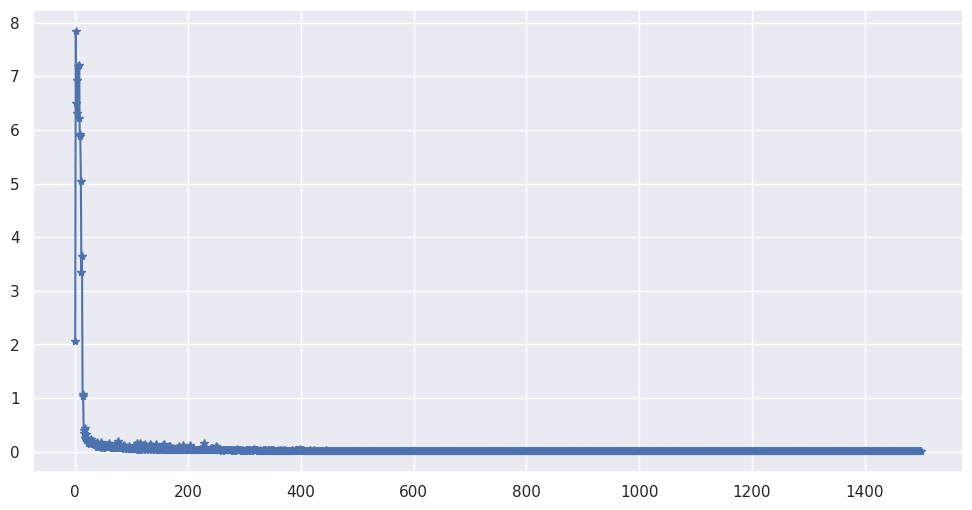

train Accuracy: 1.0000; test Accuracy: 1.0000
True Positives:57	False Positives:0
False Negatives:0	True Negatives:48
Accuracy:1.0000
Recall:1.0000	Precision:1.0000
f1 measure:1.0000


In [32]:
# Полином 2 степени и l2 регуляризация

regr_2_1 = LogisticRegression(l1_penalty=0, l2_penalty=0.1, epochs=1500)

regr_2_1.fit(X_train_2, y_train_2)

regr_2_1.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr_2_1.score(X_train_2, y_train_2), regr_2_1.score(X_train_2, y_train_2)))

regr_2_1.classification_report(X_train_2, y_train_2)

3. Используйте модель логистической регрессии для предсказания типа трансмиссии автомобилей в наборе данных Cars.
Для оценки качества модели используйте отложенную выборку и несколько метрик классификации. Сравните результаты
модели при использовании только числовых признаков и при
добавлении категориальных признаков с помощью One-Hot кодирования.

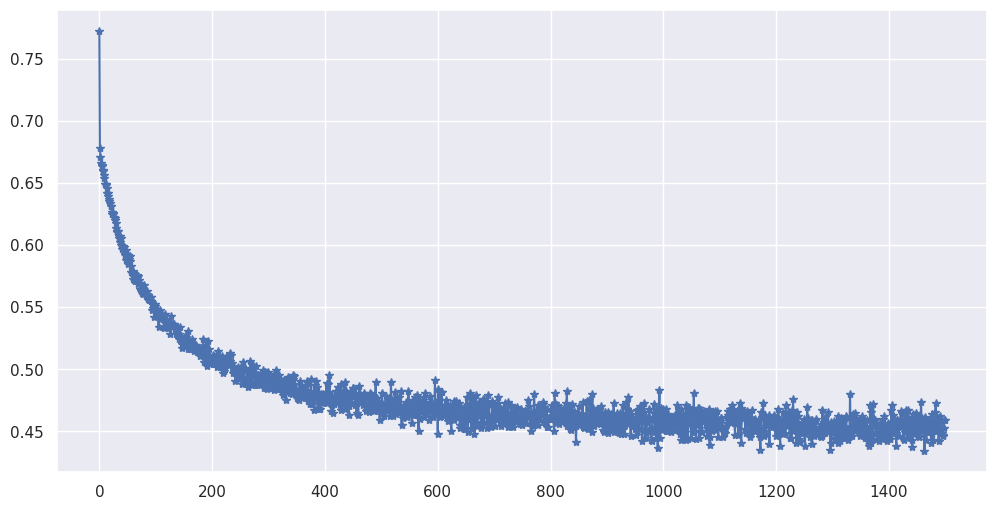

train Accuracy: 0.8040; test Accuracy: 0.8040
True Positives:7636	False Positives:1728
False Negatives:2673	True Negatives:10414
Accuracy:0.8040
Recall:0.7407	Precision:0.8155
f1 measure:0.7763


In [33]:
# Только числовые признаки

regr_3 = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000)

regr_3.fit(X_train, y_train)

regr_3.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr_3.score(X_train, y_train), regr_3.score(X_train, y_train)))

regr_3.classification_report(X_train, y_train)

In [70]:
X = df[num_columns + cat_columns].values
Y = df['Transmission'].values
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, Y, test_size=0.3)

<ipython-input-13-d21f78eb25d2>:37: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


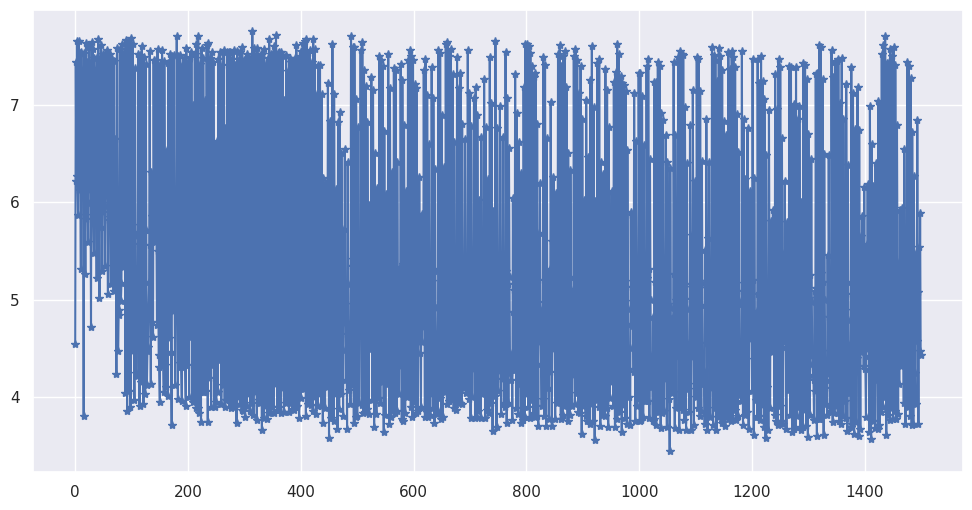

train Accuracy: 0.6494; test Accuracy: 0.6494
True Positives:9089	False Positives:6752
False Negatives:1119	True Negatives:5491
Accuracy:0.6494
Recall:0.8904	Precision:0.5738
f1 measure:0.6978


In [71]:
# Числовые и категиориальные признаки

regr_3 = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000)

regr_3.fit(X_train_3, y_train_3)

regr_3.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr_3.score(X_train_3, y_train_3), regr_3.score(X_train_3, y_train_3)))

regr_3.classification_report(X_train_3, y_train_3)

# **Контрольные вопросы**


1.   Допустим, тест на некое заболевание R дал положительный от-
вет, хотя на самом деле у испытуемого нет этого заболевания.
Какую ошибку допустил тест?

Ошибку второго рода (нулевая гипотеза принята)


2.   Пусть в матрице ошибок TP = 5, TN = 90, FP = 10, FN = 5. Оцените метрики классификации для такой матрицы ошибок.




In [35]:
true_pos = 5
true_neg = 90
false_pos = 10
false_neg = 5

accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)
precision = true_pos / (true_pos + false_pos)
recall = true_pos / (true_pos + false_neg)
specifity = true_neg / (true_neg + false_neg)
f_1_score = 2 * (precision * recall) / (precision + recall)

print('Accuracy : {}\nPrecision : {}\nRecall : {}\nSpecifity : {}\nF_1_score : {}'.format(accuracy, precision, recall, specifity, f_1_score))

Accuracy : 0.8636363636363636
Precision : 0.3333333333333333
Recall : 0.5
Specifity : 0.9473684210526315
F_1_score : 0.4


3. Допустим, есть два классификатора: первый классификатор
имеет долю правильных ответов 95 %, чувствительность 99 %,
специфичность 50 %; второй классификатор имеет долю правильных ответов 87 %, чувствительность 84 %, специфичность
94 %. Что вы можете сказать о данных, используемых для классификации? Какой из этих классификаторов надежнее (при условии, что важно определение обоих классов)?

In [36]:
prec_1 = 0.95
sens_1 = 0.99
spec_1 = 0.5

prec_2 = 0.87
sens_2 = 0.84
spec_2 = 0.94

def f_1(precision, recall):
  return 2 * (precision * recall) / (precision + recall)

f_1_1 = f_1(prec_1, sens_1)
f_1_2 = f_1(prec_2, sens_2)
print('f_1_1 : {}\nf_1_2 : {}'.format(f_1_1, f_1_2))

if (f_1_1 > f_1_2):
  print('Первый классификатор надежнее')
else:
  print('Второй классификатор надежнее')

f_1_1 : 0.9695876288659794
f_1_2 : 0.8547368421052631
Первый классификатор надежнее


4. Перечислите все возможные гиперпараметры логистической модели


*   Тип регуляризации. Определяет способ изменения весов модели. Существует два типа регуляризации - L1 и L2 регуляризация.
*   C (коэффициент регуляризации). Определяет степень регуляризации модели, чем значение C меньше, тем сильнее регуляризация.
*   Число итераций. Задает максимальное количество итераций, после которого модель завершает обучение.
*   Порог сходимости (tolerance). Определяет порог точности модели при достижении которого обучение модели прекращается.
*   Веса классов. Этот гиперпараметр используется для работы с несбалансированными данными.Он позволяет установить определенные веса для каждого класса, заставляя модель уделять больше внимания меньшинству классов.

5. Для набора данных Cars проанализируйте веса моделей при использовании только числовых признаков. Назовите параметр,
который в наибольшей степени связан с целевой переменной.







In [44]:
regr_4 = LogisticRegression()
regr_4.fit(X_train, y_train)
weights = regr_4.weights
max_weight= max(weights)

for i in range(len(weights)):
  if weights[i] == max_weight:
    m_weight_index = i

num_columns[m_weight_index]

'km_year'

6. Оцените значение функции сигмоиды для z = 0.25

In [38]:
z = 0.25
sigmoid(z)

0.5621765008857981

7. Оцените значение производной функции сигмоиды для z = -3

In [39]:
z = -3
sigmoid_derivative(z)

0.04517665973091214

8. Назовите, к какому классу следует отнести результат логистической модели для z = 0.1, если порог равен 0.6

In [40]:
regr = LogisticRegression(threshold=0.6)
regr.to_class(0.1)

0